In [1]:
%matplotlib inline

from pml_utils import get_mnist, show_failures

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set()

In [28]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

MNIST data loaded: train: 1347 test: 450
X_train: (1347, 64)
y_train: (1347,)
X_test (450, 64)
y_test (450,)


### Checking for outliers, which isn't really needed with this dataset

In [3]:
min_val = X_train.mean() - (3*X_train.std())
min_val

-202.38404850036397

In [4]:
max_val = X_train.mean() + (3*X_train.std())
max_val

269.02089140002386

In [5]:
outliers = X_train[X_train > max_val]
outliers

array([], dtype=float64)

No outliers

### Standardazion, which again, won't be needed with this dataset

In [8]:
x_standardized = (X_train - X_train.min())/X_train.std()
x_standardized[0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
print("Mean: " + str(x_standardized.mean()))
print("Standard Deviation: " + str(x_standardized.std()))

Mean: 0.4240738943915651
Standard Deviation: 0.9999999999999998


---
## Voting

Voting ensamble combines the prediction from several machine learning models together.

It's like creating the ultimate Frankenstein-machine-learning model.

#### In the case of classification,
the predictions for each label are summed and the label with the majority vote is predicted.

#### There are 2 types of voting methods: Hard and soft:

- Hard voting
    - Summing the predictions for each class label and predicting the class label with the most votes. 
- Soft voting
    - Summing the predicted probabilities (or probability-like scores) for each class label and predicting the class label with the largest probability.

Voting ensamble is a meta-model, so it can be used with any collection of existing trained models.

A voting ensemble is appropriate when you have two or more models that perform well on a predictive modeling task. The models used in the ensemble must mostly agree with their predictions.

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier()

clf2 = RandomForestClassifier(n_estimators=50,
                              random_state=1)

clf3 = GaussianNB()

In [100]:
clf_vote = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                         voting='hard')

clf_vote.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,

In [101]:
#eclf1.predict(X_test)
pred_vote = clf_vote.predict(X_test)
print('Predicted', len(pred_vote), 'digits with accuracy:', accuracy_score(y_test, pred_vote))

Predicted 450 digits with accuracy: 0.9755555555555555


In [102]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(multi_class='multinomial',
                             random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[('lr', clf1),
                                     ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='hard')

print(eclf1.fit(X_train, y_train))
pred_bnb = eclf1.predict(X_test)
print('Predicted', len(pred_bnb), 'digits with accuracy:', accuracy_score(y_test, pred_bnb))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=Non...
                                        

In [104]:
np.array_equal(eclf1.named_estimators_.lr.predict(X_train),
               eclf1.named_estimators_['lr'].predict(X_train))

True

In [105]:
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                         voting='soft')

eclf2 = eclf2.fit(X_train, y_train)
print(eclf2.predict(X_test))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 5 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 3 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 1 2 0 7 6 1 1 9 7 2 7 1 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 1 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 8 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 4 0 4 5 9 3 3 4 3 1 8 9 8 3 6 8 1 6 2
 1 7 5 5 1 9]


In [106]:
print(eclf2.transform(X_train).shape)

(1347, 30)


---
## Stacking

Stacking model combines the predictions from multiple models on the same dataset, like bagging and boosting.

Stacking is about finding the most appropiate machine learning model to use from a group of many competent ones.

- Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).
- Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).

#### The architecture of a stacking mode:

- Level-0 Models (Base-Models)
    - Models fit on the training data and whose predictions are compiled.
- Level-1 Model (Meta-Model)
    - Model that learns how to best combine the predictions of the base models.
    
The meta-model is trained on the predictions made by base models on out-of-sample data. 

That is, data not used to train the base models is fed to the base models, predictions are made, and these predictions, along with the expected outputs, provide the input and output pairs of the training dataset used to fit the meta-model.

The outputs from the base models used as input to the meta-model may be real value in the case of regression, and probability values, probability like values, or class labels in the case of classification.

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(),
                                    LinearSVC(random_state=42)))]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9622222222222222

Stacking model returns with the accuracy of 96%

---
## Bagging (Bootstrap Aggregation)

Specifically, it is an ensemble of decision tree models, although the bagging technique can also be used to combine the predictions of other types of models.

It's based on the *"bootstrap"* sample:

A *bootstrap sample* is a sample of a dataset with **replacement**. **Replacement** means that a sample drawn from the dataset is replaced, allowing it to be **selected again** and perhaps multiple times in the new sample. This means that the sample may have **duplicate examples** from the original dataset.

The bootstrap sampling technique is used to estimate a population statistic from a small data sample. This is achieved by drawing multiple bootstrap samples, calculating the statistic on each, and reporting the mean statistic across all samples.

In [65]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score


# Define the model
model = BaggingClassifier()

# Evaluate the model using **repeated stratified k-fold cross-validation**, with three repeats and 10 folds. 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [66]:
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Print the mean and standard deviation of the accuracy of the model across all repeats and folds.
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.922 (0.020)


Classification accuracy is about 92% on default hyperparameters

#### Getting the amount of n_features to create a list for the prediction

In [67]:
X_train.shape

(1347, 64)

In [84]:
import random

# list of random in between a range 0 to 10
randomIntList = []

for i in range(0, 64):
    x = random.randint(0, 10)
    randomIntList.append(x)

In [83]:
model = BaggingClassifier()

# fit the model on the whole dataset
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("\nTrain accuracy:", model.score(X_test, y_test))
# make a single prediction
# Prediction requires a 1D or 2D array
yhat = model.predict([randomIntList])

print('Predicted Class: ', yhat[0])

Train accuracy: 0.9985152190051967

Train accuracy: 0.9155555555555556
Predicted Class:  4


In [43]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = BaggingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.940 (0.005)


KeyboardInterrupt: 

---
## Boosting

Boosting creates a strong classifier from multiple weak ones.

Model is built from the training data, then a second model is created which corrects the first one's errors. 

Models are added until the training set is predicted perfectly or a maximum number of models are added.

**AdaBoost** was the first really successful boosting algorithm developed for binary classification.

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Create and fit an AdaBoosted decision tree
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200,
                         random_state=0)

clf.fit(X_train, y_train)

clf.predict([randomIntList])

array([3])

In [88]:
clf.score(X_train, y_train)

0.8864142538975501

---

# General-use classifier

In [97]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

## For voting

In [94]:
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
	models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
	models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
	models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
	models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble
 
# get a list of models to evaluate
def get_models_voting():
	models = dict()
	models['knn1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn9'] = KNeighborsClassifier(n_neighbors=9)
	models['hard_voting'] = get_voting()
	return models

## For stacking

In [95]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models_stacking():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

## Model evaluation

In [ ]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

## Boxplot of model performance

Boxplot to show the distribution of model error scores

>knn1 0.988 (0.009)
>knn3 0.988 (0.009)
>knn5 0.988 (0.009)
>knn7 0.984 (0.011)
>knn9 0.980 (0.009)
>hard_voting 0.987 (0.009)


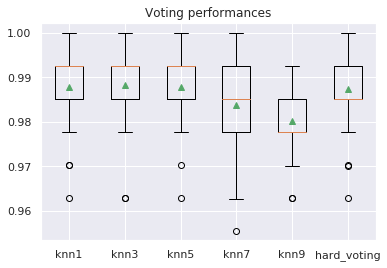

In [92]:
import matplotlib.pyplot as plt

# get the models to evaluate
models = get_models_voting()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title("Voting performances")
plt.show()

>lr 0.966 (0.012)
>knn 0.988 (0.009)
>cart 0.844 (0.033)
>svm 0.987 (0.006)
>bayes 0.834 (0.021)
>stacking 0.987 (0.007)


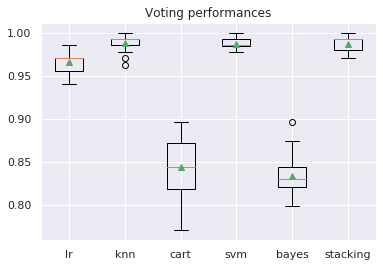

In [98]:
import matplotlib.pyplot as plt

# get the models to evaluate
models = get_models_stacking()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title("Voting performances")
plt.show()

The cart and bayes models seem to have the worst mean and median scores.

The other ones are fine.

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

X_train2

array([[ 0.        ,  2.85610953,  1.62260165, ...,  0.89887909,
         1.74648816,  0.38393236],
       [ 0.        , -0.33833791, -0.88123922, ...,  1.06879069,
        -0.25013357, -0.18751172],
       [ 0.        , -0.33833791, -0.255279  , ...,  0.38914426,
        -0.49971129, -0.18751172],
       ...,
       [ 0.        , -0.33833791, -0.04662559, ..., -1.14006023,
        -0.49971129, -0.18751172],
       [ 0.        , -0.33833791, -0.255279  , ..., -1.14006023,
        -0.49971129, -0.18751172],
       [ 0.        , -0.33833791,  0.16202781, ...,  0.72896748,
        -0.49971129, -0.18751172]])

In [108]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y2 = label_encoder.fit_transform(y_train)
y2

array([2, 8, 9, ..., 7, 7, 8])

In [ ]:
#newData = [[0,51]]
#print(algorithm.predict(newData))
'''plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X_train)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
X_train, y_train = plt.axis()
plt.axis((X_train, y_train * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()'''